# CMF Rateslib Project

## 3 Sub-Projects:
    - Rates Models
    - FI Products
    - Curve Building
  


### Conventions
 - 1 year == 1.0
 - 1 month == 1/12
 - 1 day == 1/252
 - 0.02 == 2%

In [1]:
cmf_rateslib_root = '../'
import sys
if cmf_rateslib_root not in sys.path:
    sys.path.append(cmf_rateslib_root)

In [2]:
import numpy as np

In [3]:
dt = 1/252
dW = np.random.randn()*dt
# Mean that dW is 1 day increment with unit annual vol

In [4]:
a=np.interp([2,1.5],[1,3,4],[5,6,7])

# Curves

In [5]:
from cmf_rateslib.curves.base_curve import BaseZeroCurve

In [6]:
from scipy.linalg import sqrtm

In [7]:
curve = BaseZeroCurve([0,2,5,10], [0.01, 0.02, 0.03, 0.03])

In [8]:
curve.df(0.15)

0.9983887993796147

In [9]:
curve.zero_rate(4.5)

0.028333333333333332

In [10]:
curve.fwd_rate(1, 1.5)

-0.026111111111111127

In [11]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


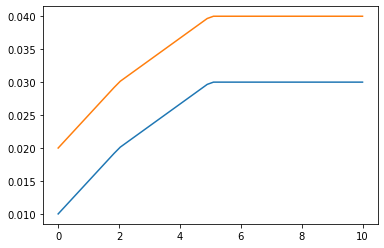

In [12]:
t = np.linspace(0, 10)
plot(t, curve.zero_rate(t), t, curve.bump(0.01).zero_rate(t))

In [13]:
spread_curve = BaseZeroCurve([0, 5, 10], [0.001, 0.002, 0.003])

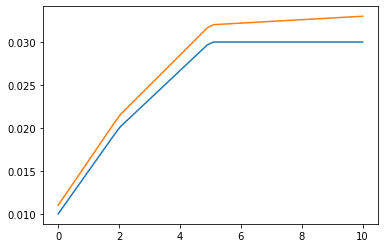

In [14]:
t = np.linspace(0, 10)
new_curve = curve + spread_curve
plot(t, curve.zero_rate(t), t, new_curve.zero_rate(t))

## Interpolation & extrapolation

In [15]:
from cmf_rateslib.curves.zero_curve import ZeroCurve

In [16]:
curve = ZeroCurve([3,5,10,15,19], [0.02, 0.03, 0.04,0.045,0.049], 'zero_rate','continuous',0)

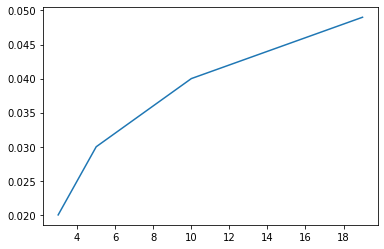

In [17]:
plt.plot(curve._maturities,curve._rates)

In [18]:
t_inter = np.linspace(0, 15)+3.1
t_extra1 = np.linspace(0,3)+19.1
t_extra2 = np.linspace(0,2.9)

t_all = np.append(t_extra2,t_inter)
t_all=np.append(t_all,t_extra1)

mode='zero_rate'
pow=2
rates1 = curve.extrapolate(t_extra2,pow=pow)
rates2 = curve.interpolate(t_inter,pow=pow)
rates3 = curve.extrapolate(t_extra1,pow=pow)

rates_all=np.append(rates1,rates2)
rates_all=np.append(rates_all,rates3)

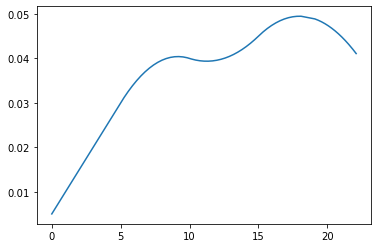

In [19]:
plt.plot(t_all,rates_all)

## Bumping

''

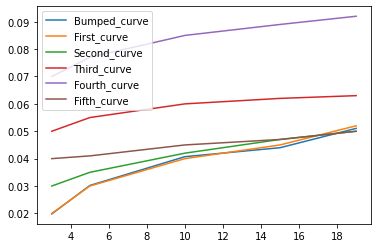

In [60]:
curve1 = ZeroCurve([3,5,10,15,19], [0.02, 0.03, 0.04,0.045,0.052], 'zero_rate','continuous',0)
curve2 = ZeroCurve([3,5,10,15,19], [0.03, 0.035, 0.042,0.047,0.05], 'zero_rate','continuous',0)
curve3 = ZeroCurve([3,5,10,15,19], [0.05, 0.055, 0.06,0.062,0.063], 'zero_rate','continuous',0)
curve4 = ZeroCurve([3,5,10,15,19], [0.07, 0.077, 0.085,0.089,0.092], 'zero_rate','continuous',0)
curve5 = ZeroCurve([3,5,10,15,19], [0.04, 0.041, 0.045,0.047,0.05], 'zero_rate','continuous',0)

plt.plot(curve1._maturities,curve1.bump_pca(np.array([curve1._rates,curve2._rates,curve3._rates,curve4._rates,curve5._rates]).T, [0.02, 0.03, 0.04,0.045,0.052],[0,1,2,3,4]),
        curve1._maturities,curve1._rates, 
        curve2._maturities,curve2._rates,
        curve3._maturities,curve3._rates,
        curve4._maturities,curve4._rates,
        curve5._maturities,curve5._rates,)
plt.legend(['Bumped_curve', 'First_curve', 'Second_curve', 'Third_curve', 'Fourth_curve', 'Fifth_curve'])
;

## Roll

''

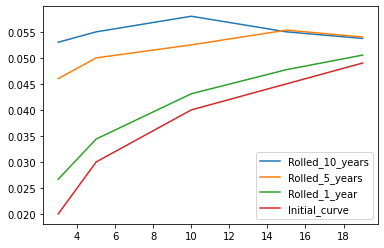

In [21]:
plt.plot(curve._maturities, curve.roll(10)._rates, curve._maturities, curve.roll(5)._rates, curve._maturities, curve.roll(1)._rates, curve._maturities,curve._rates)
plt.legend(['Rolled_10_years','Rolled_5_years','Rolled_1_year', 'Initial_curve'])
;

## Discrete_compounding

In [50]:
curve1 = ZeroCurve([3,5], [0.2,0.4], 'zero_rate','discrete',3)
curve1.df(3)

0.5594245067186422

In [51]:
cont_rate = 3*np.log(1+0.2/3)
print(cont_rate)
curve1 = ZeroCurve([3,5], [cont_rate,0.4], 'zero_rate','continuous',3)
curve1.df(3)

0.1936155634127135


0.5594245067186421

# Products

In [23]:
from cmf_rateslib.products.base_product import BaseProduct

In [24]:
p = BaseProduct()

In [25]:
p.get_cashflows()

In [26]:
p.pv()

0

In [27]:
from cmf_rateslib.products.bonds import ZCBond

In [28]:
bond = ZCBond(expiry=9)

In [29]:
bond.get_cashflows()

(array([9]), array([1]))

In [30]:
bond.pv(0, curve + spread_curve)

0.692671096970652

# Rates Models

 Simple PCA curve Generator
 
 $n$ zero rates and $m$ factors
 $$
     dZ = U dX
 $$
 
 $$
 dX_i = \sigma_i dW_i 
 $$
 
 Mean Reverting PCA curve Generator
 
 Same as abobe, but:
 $$
 dX_i = (\theta_i - X)dt + \sigma_i dW_i 
 $$

In [31]:
from cmf_rateslib.rates.simple_pca import SimplePCAModel

In [32]:
model = SimplePCAModel(
    maturities=[0, 2, 5, 10],
    maturity_loadings=np.array([
        [1,1,1,1],
        [0,1,2,3],
        [2,1,1,2]]).T,
        factor_vols=[0.01, 0.005, 0.001])

In [33]:
model.evolve_zero_curve(curve, 5, 1/252)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
np.array([[2,2,2], [3,3,3]]).T * np.array([2,2])

In [ ]:
bool()